In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score



In [2]:
data=pd.read_csv('data.csv')
# data.head()
# data.info()
# data.describe()

n=data.isnull().sum()
print(n)





Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


In [3]:
data['Courier_Experience_yrs']=data['Courier_Experience_yrs'].fillna(data['Courier_Experience_yrs'].mean())
data['Weather']=data['Weather'].fillna(data['Weather'].mode()[0])
data['Traffic_Level']=data['Traffic_Level'].fillna(data['Traffic_Level'].mode()[0])
data['Time_of_Day']=data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0])

# n=data.isnull().sum()
# print(n)

In [4]:
# data.to_csv("clean_data.csv")
df=pd.read_csv("clean_data.csv")
df.head()

,Unnamed: 0,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


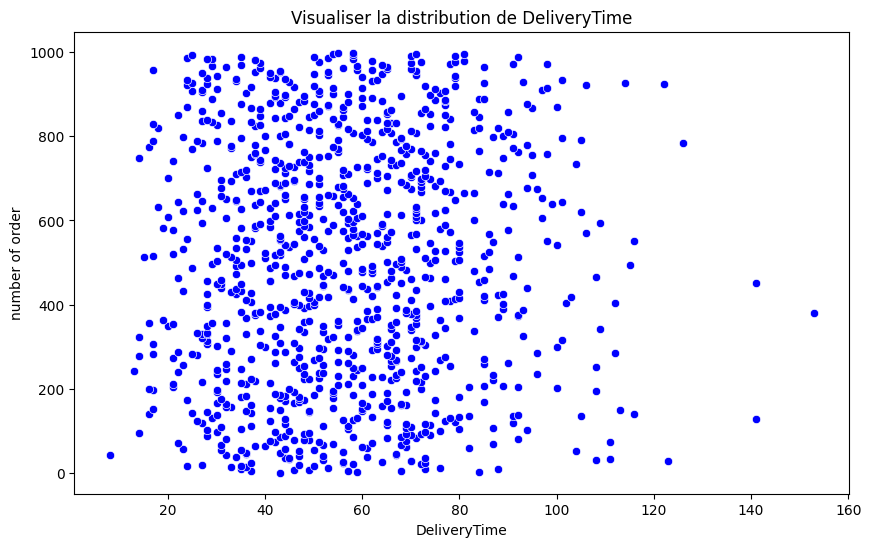

In [5]:
#Visualiser la distribution de DeliveryTime
data=pd.DataFrame(df)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delivery_Time_min',y=df.index,data=df, color="blue")
plt.title('Visualiser la distribution de DeliveryTime')
plt.xlabel('DeliveryTime')
plt.ylabel('number of order')
plt.show()


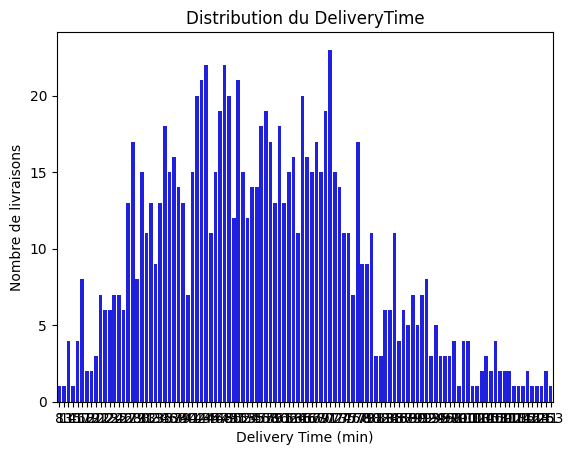

In [6]:
 
sns.barplot(
    x=df['Delivery_Time_min'].value_counts().index,
    y=df['Delivery_Time_min'].value_counts().values,
    color="blue"
)
plt.title('Distribution du DeliveryTime')
plt.xlabel('Delivery Time (min)')
plt.ylabel('Nombre de livraisons')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13108\3677987930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


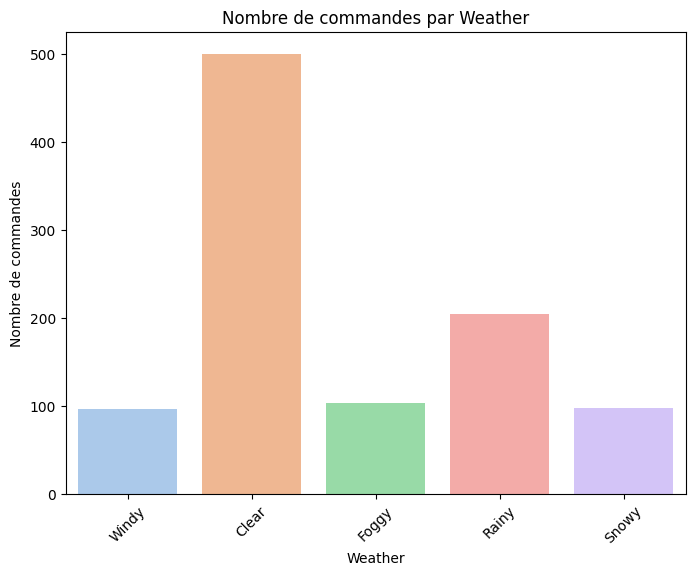

C:\Users\HP\AppData\Local\Temp\ipykernel_13108\3677987930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


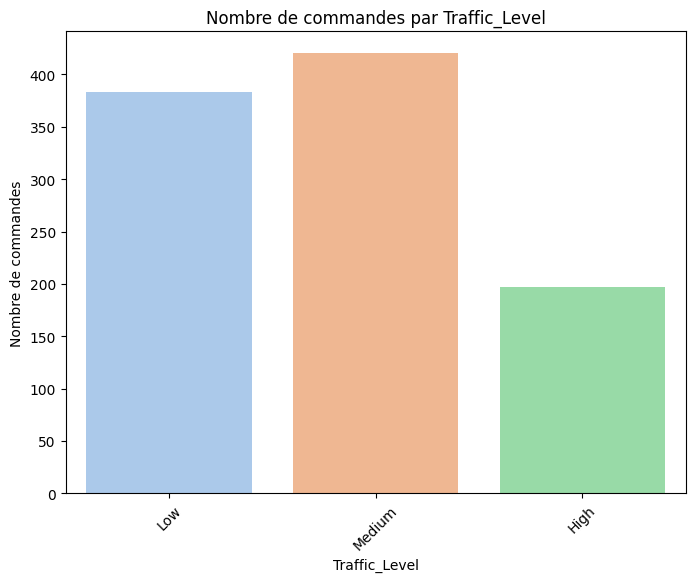

C:\Users\HP\AppData\Local\Temp\ipykernel_13108\3677987930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


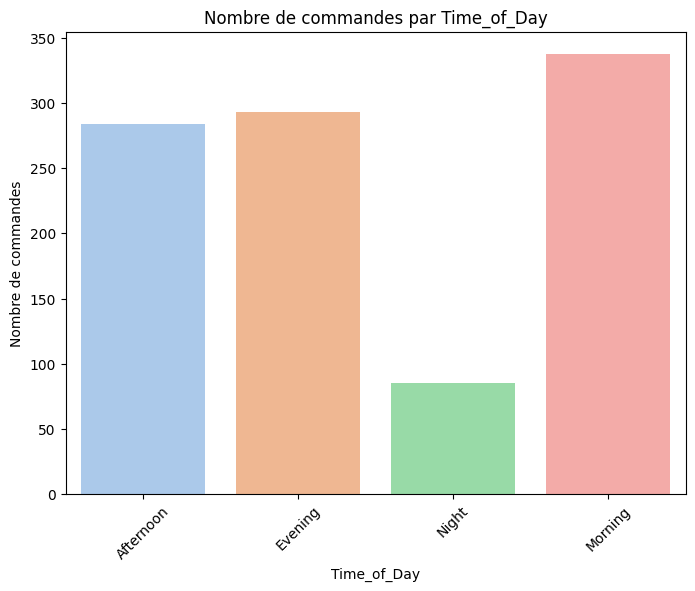

C:\Users\HP\AppData\Local\Temp\ipykernel_13108\3677987930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


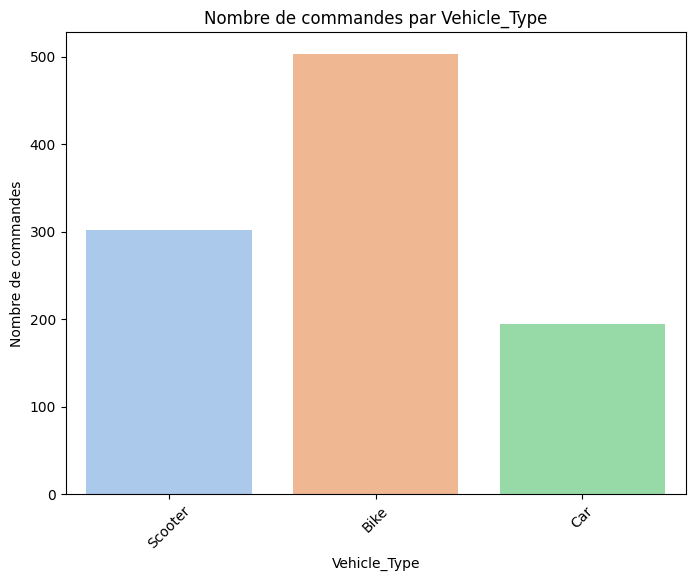

In [7]:
cols=['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

for col in cols:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f"Nombre de commandes par {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre de commandes")
    plt.xticks(rotation=45)
    plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_13108\3705210888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Delivery_Time_min", data=df, palette='pastel')


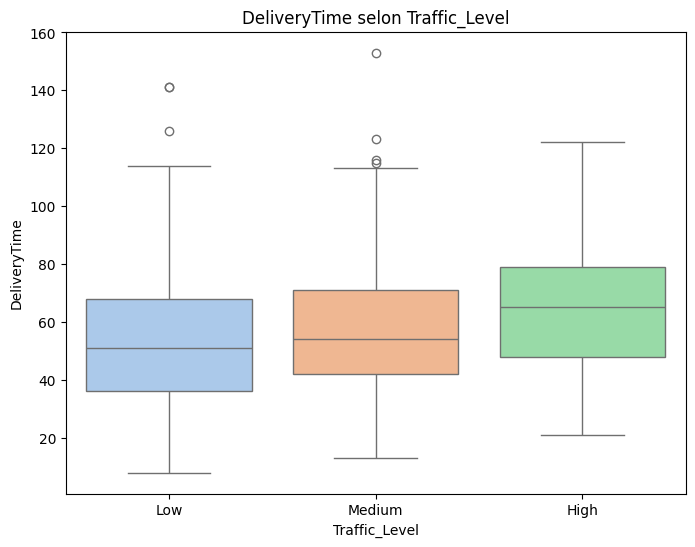

C:\Users\HP\AppData\Local\Temp\ipykernel_13108\3705210888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Delivery_Time_min", data=df, palette='pastel')


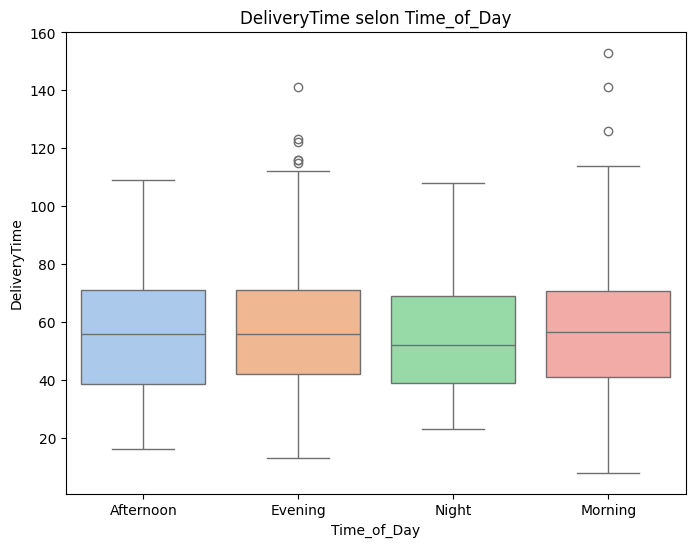

C:\Users\HP\AppData\Local\Temp\ipykernel_13108\3705210888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Delivery_Time_min", data=df, palette='pastel')


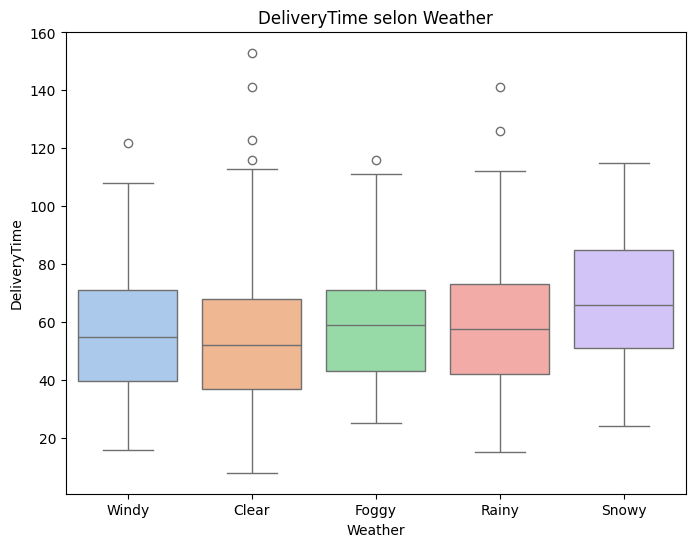

In [39]:
#boxplot
cols=["Traffic_Level","Time_of_Day","Weather"]
for col in cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=col, y="Delivery_Time_min", data=df, palette='pastel')
    plt.title(f"DeliveryTime selon {col}")
    plt.xlabel(col)
    plt.ylabel("DeliveryTime")
    plt.show()



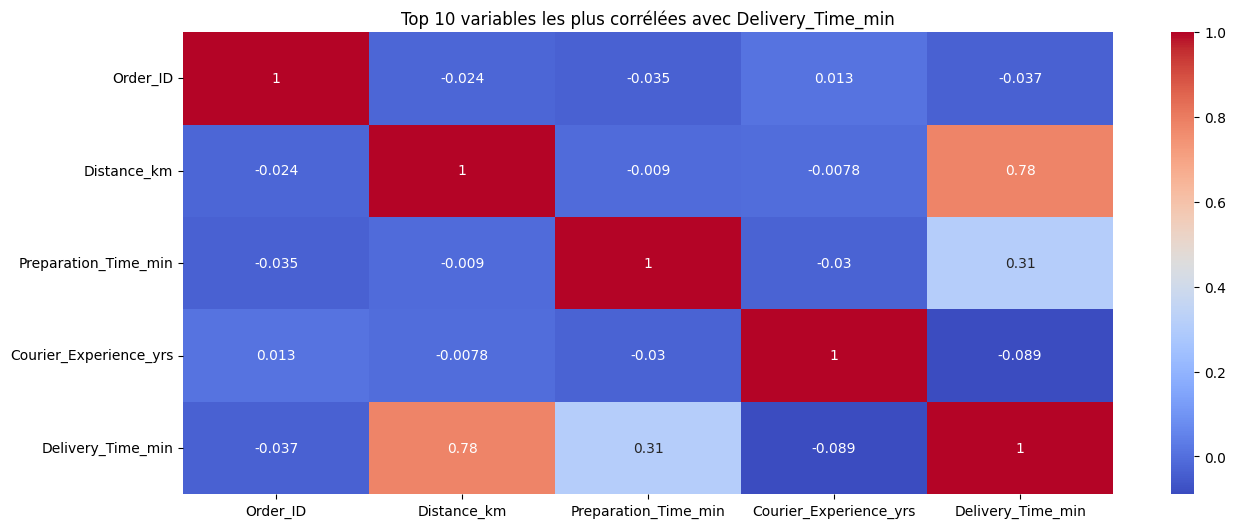

In [ ]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    
df_num=df.select_dtypes(include=['number'])   
matrice_correlation = df_num.corr()

plt.figure(figsize=(15,6))
sns.heatmap(matrice_correlation,annot=True,cmap='coolwarm')
plt.title(' variables les plus corrélées avec Delivery_Time_min')
plt.show()


# plt.figure(figsize=(10,6))
# d=pd.DataFrame(df)
# sns.heatmap(d.corr(),annot=True,cmap='coolwarm')
# plt.title('Matrice Corrélation')
# plt.show()


In [ ]:
#transformation des columns categoriels
cols_cat = ['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[cols_cat])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cols_cat), index=df.index)

# cols=['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']
# encoder=OneHotEncoder(sparse_output=False)
# encoded=encoder.fit_transform(df[cols])
# print(encoded)
# encoded_df=pd.DataFrame(
#    encoded,
#     columns=encoder.get_feature_names_out(cols),
#     index=df.index
# )




In [ ]:
cols_num=["Delivery_Time_min","Courier_Experience_yrs","Preparation_Time_min","Distance_km"]

for col in cols_num:
    scaler =StandardScaler()
    df_scaled=df.copy()
    df_scaled[col]
    scaled_data = scaler.fit_transform(df)
    df_scaled=pd.DataFrame(scaled_data,columns=df.columns)
    print(df_scaled)

In [ ]:
X=pd.concat([df_num.drop(columns=["Delivery_Time_min","Order_ID"]),encoded_df],axis=1)
y=df_scaled["Delivery_Time_min"]
selector = SelectKBest(score_func=f_regression, k=3)
X_new=selector.fit_transform(X,y)

selected_cols=X.columns[selector.get_support()]
print(list(selected_cols))

scores = pd.DataFrame({
    'Variable': X.columns,
    'F_Score': selector.scores_,
    'P_Value': selector.pvalues_
}).sort_values(by='F_Score', ascending=False)

print(scores)


['Distance_km', 'Preparation_Time_min', 'Traffic_Level_High']
                  Variable      F_Score        P_Value
0              Distance_km  1560.701668  2.976269e-206
1     Preparation_Time_min   104.109689   2.549879e-23
8       Traffic_Level_High    33.922521   7.729205e-09
3            Weather_Clear    27.025878   2.434604e-07
6            Weather_Snowy    24.320752   9.548257e-07
9        Traffic_Level_Low    19.201370   1.300707e-05
2   Courier_Experience_yrs     7.982364   4.817698e-03
5            Weather_Rainy     4.952621   2.627395e-02
4            Weather_Foggy     1.763352   1.845106e-01
16        Vehicle_Type_Car     1.071720   3.008080e-01
12     Time_of_Day_Evening     0.477319   4.897997e-01
14       Time_of_Day_Night     0.440489   5.070396e-01
17    Vehicle_Type_Scooter     0.417304   5.184338e-01
7            Weather_Windy     0.353421   5.523176e-01
11   Time_of_Day_Afternoon     0.344874   5.571621e-01
10    Traffic_Level_Medium     0.116126   7.333464e-01
13 

In [57]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestRegressor(random_state=42)

param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,5,10],
    'min_samples_split': [2, 5, 10]
}

# model=SVR()
# param_grid={
    # 'kernel': ['linear', 'rbf'],
    # 'C': [1, 10],
    # 'gamma': ['scale', 'auto']
# }

grid_search=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train,y_train)

y_pred=grid_search.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("mae: ",mae)
print("r2: ",r2)

print("meilleur hyperparametre: ",grid_search.best_params_)
print("meilleur score R²: ",grid_search.best_score_)

r2_test=grid_search.score(X_test,y_test)
print("R² sur le test set: ",r2_test)



mae:  0.3070959686179099
r2:  0.7928930292221703
meilleur hyperparametre:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
meilleur score R²:  0.7061203955831008
R² sur le test set:  0.7928930292221703
